# DAP Project - Modeling & Predicting of Churning Customers

In [750]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [751]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


## Wrangling Data

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Data type của dữ liệu tương đối chuẩn, object thì đều là category, cẩn chỉnh 1 chút giữa float và int

In [753]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,36903783.45,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,708082083.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,713036770.50,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,717926358.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,773143533.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,828343083.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


In [754]:
df.describe(include=['object'], exclude=['int64', 'float64'])


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


- Để cleaning data 1 cách hiệu quả nhất thì phải có cái nhìn tổng quan về data qua việc visualize cơ bản phân bố bộ dữ liệu.
- Trong quá trình xử lý toàn bộ project dưới đây, nhiều bước bắt buộc phải được thực hiện song song chứ khó có thể chia ra từng step 1 cách riêng rẽ và đơn giản như trong lý thuyết

In [755]:
# Drop cột này vì eda cũng không có tác dụng
df.drop('CLIENTNUM', axis=1, inplace=True)

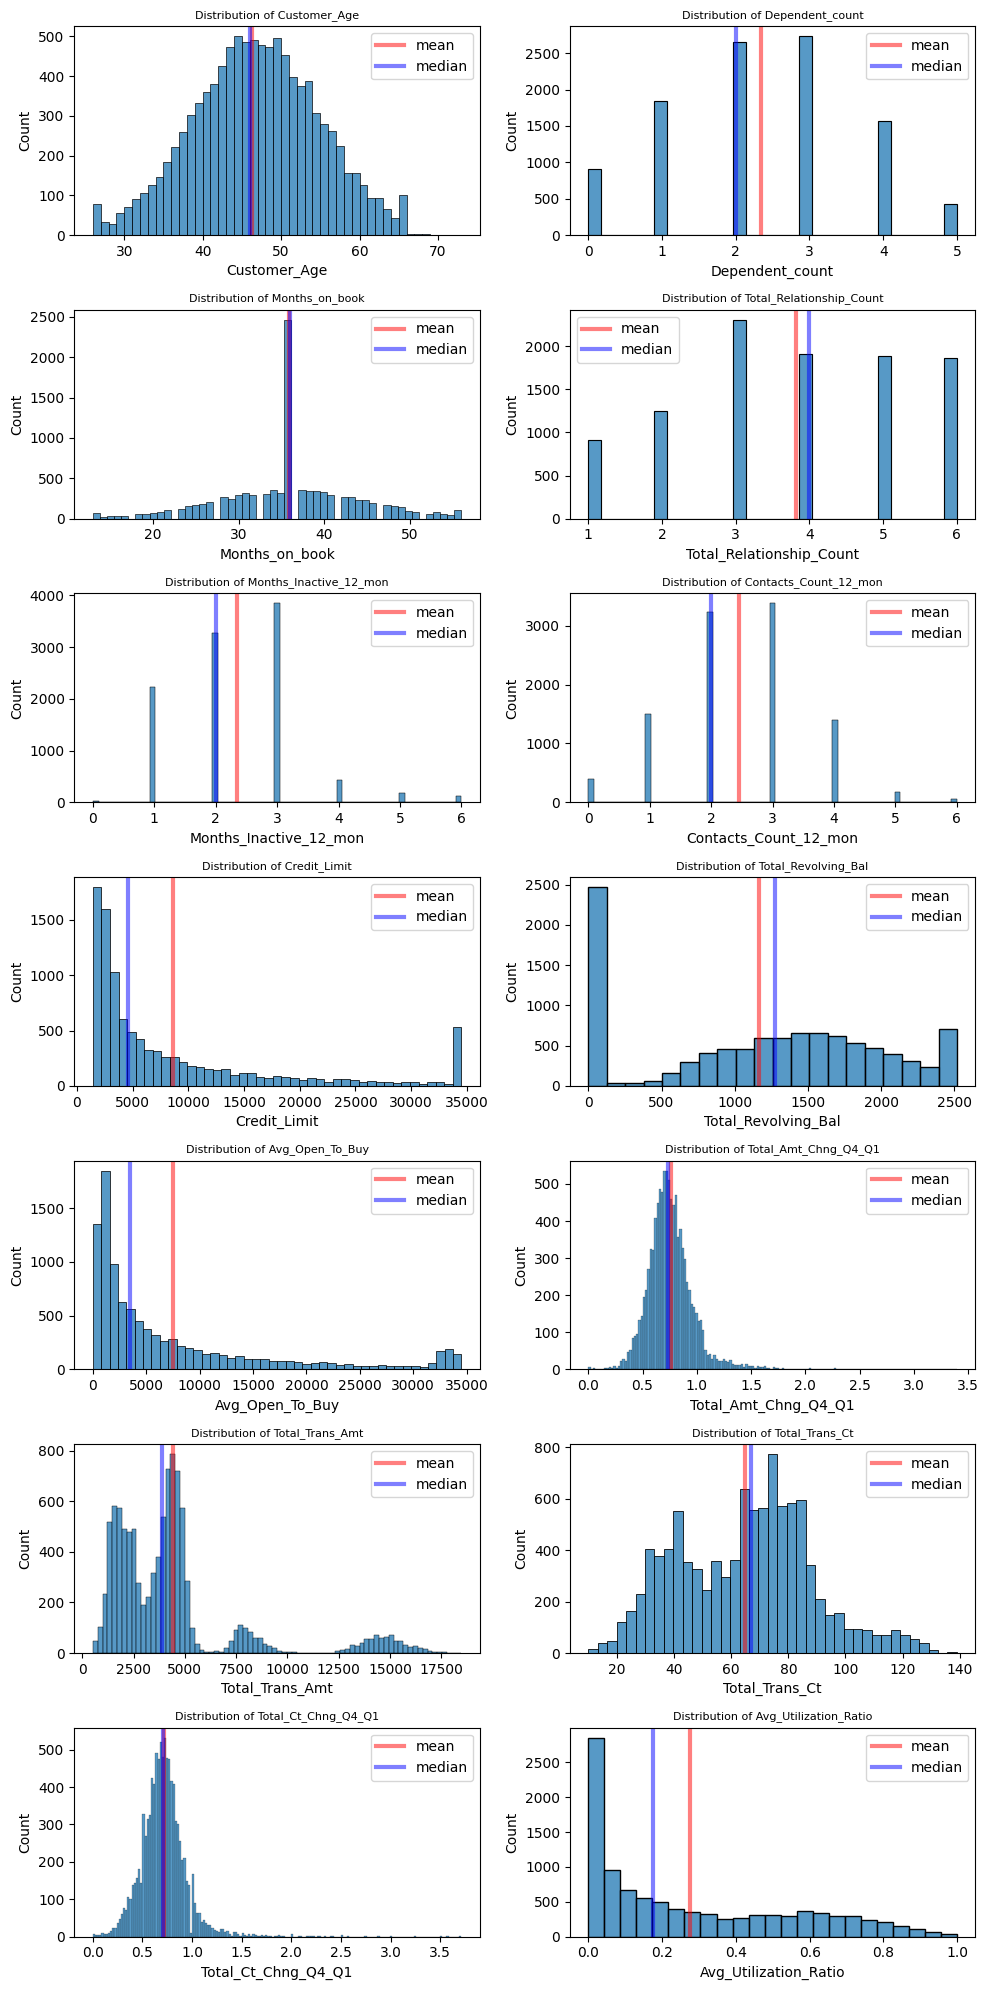

In [756]:
fig, axes = plt.subplots(7, 2, figsize=(10, 20))
numeric_columns = df.select_dtypes(exclude=['object']).columns

k = 0
for i in range(7):
    for j in range(2):
        sns.histplot(x= numeric_columns[k], data=df, ax=axes[i, j])

        axes[i, j].axvline(x=df[numeric_columns[k]].mean(), linewidth=3, color='r', label="mean", alpha=0.5)
        axes[i, j].axvline(x=df[numeric_columns[k]].median(), linewidth=3, color='b', label="median", alpha=0.5)

        axes[i, j].set_xlabel(numeric_columns[k])
        axes[i, j].set_ylabel("Count")
        axes[i, j].set_title(f"Distribution of {numeric_columns[k]}", size=8)
        axes[i, j].legend(["mean", "median"])
        k += 1
            
plt.tight_layout()
plt.show()


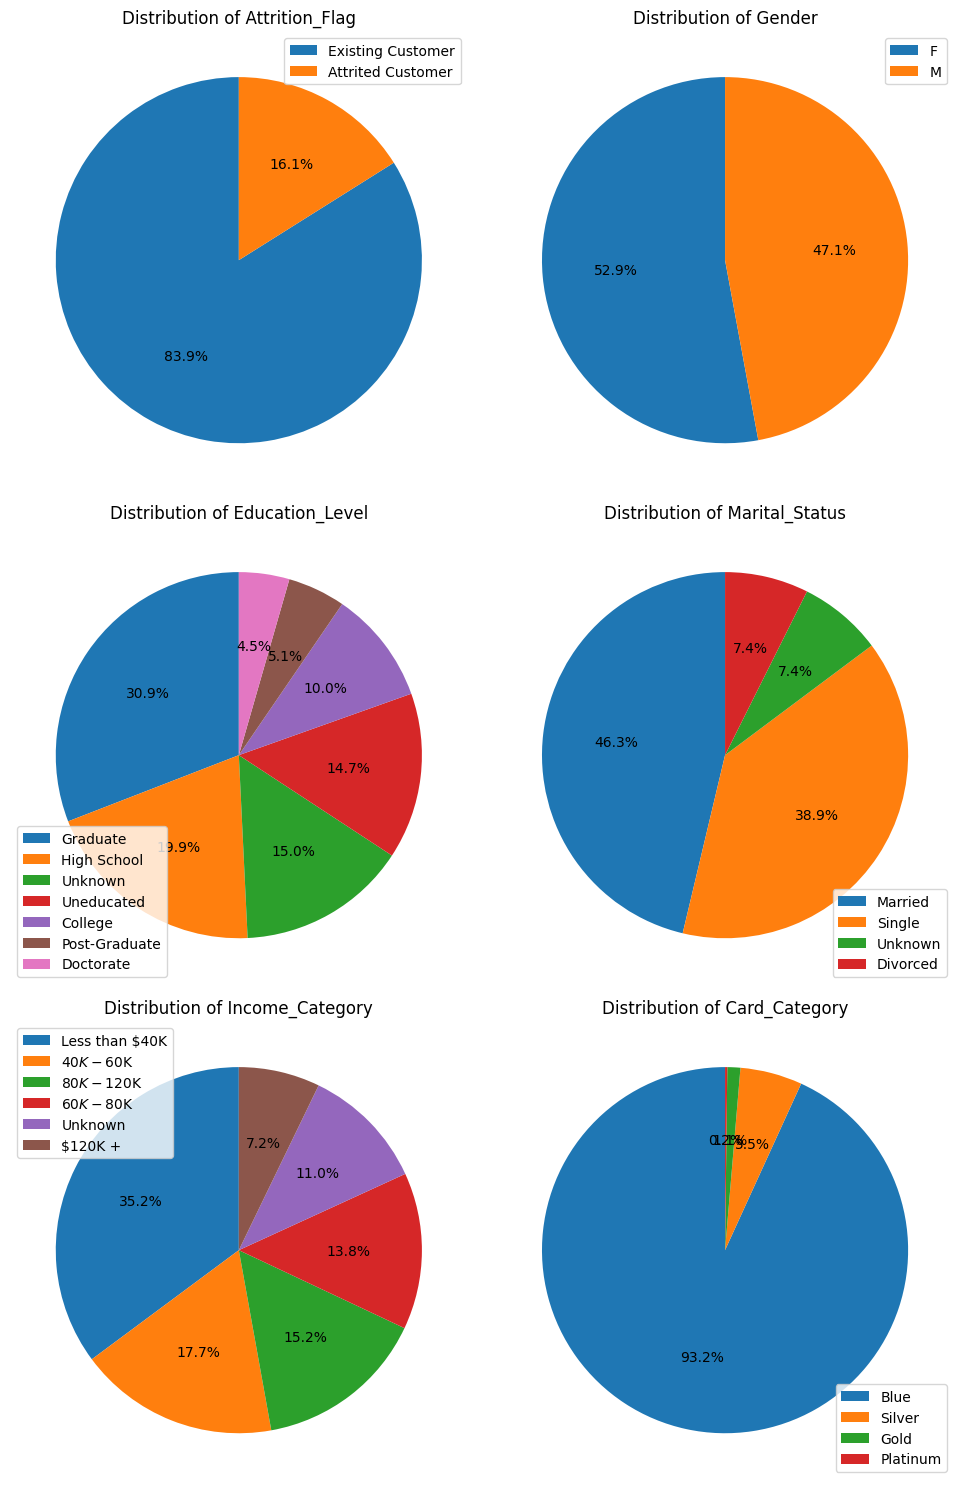

In [757]:
object_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

k = 0
for i in range(3):
    for j in range(2):
        values = df[object_columns[k]].value_counts().values
        labels = df[object_columns[k]].value_counts().index
        axes[i, j].pie(values, autopct='%1.1f%%', startangle=90)
        axes[i, j].set_title(f"Distribution of {object_columns[k]}", size=12)
        axes[i, j].legend(labels)
        k += 1
plt.tight_layout()
plt.show()

### Data Formatting

Không cần phải format data vì data được lấy từ 1 nguồn duy nhất.

### Handling missing values

In [758]:
unknown_counts = df.apply(lambda x: x.eq('Unknown').sum())
unknown_counts

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Vì là dữ liệu dạng category nên cách đơn giản nhất là thay thế missing value bằng mode, nhưng như thế sẽ làm mất đi tính logic của dữ liệu.
Ví dụ xét về income category thì Less than $40K là nhiều nhất, nếu lập tức thay giá trị bằng Less than $40K mà không quan tâm đến các yếu tố như hạn mức tín dụng, thì sẽ xảy ra tình trạng 1 thằng nghèo nhưng lại có hạn mức tín dụng siêu cao, hay outlier.
Cái t2 vì lượng missing value tương đối nhiều nên yêu cầu phải có 1 cách xử lý khác hiệu quả hơn

=> Dự đoán missing value dựa vào các feature còn lại -- sử dụng KNN để giữ tính đơn giản mà độ hiệu quả vẫn tương đối cao
+ Nếu sd cách thông thường phải encoding, normalization mới điền được missing value, rồi encoding, normalization lần nữa

+ Nếu sd KNNImpute của sklearn.impute thì nó vẫn cần encoding và normalization trước. Sau đó tiến hành impute rồi encoding lại.

Giờ chỉ còn cách encoding và normalization nhưng chừa ra 3 cột có NaN, rồi sử dụng KNNimpute xong mới encoding 3 cột đó



Chuyển hết giá trị 'Unknown' về NaN cho dễ xử lý bằng thư viện

In [759]:
df.replace("Unknown", np.nan, inplace=True)

In [760]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Encoding những features không chứa NaN

In [761]:
object_columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

Attrition Flag, Gender thì binary encoding vì chỉ có 2 giá trị

Attrition Flag:
+ Existing Customer = 1
+ Attrited Customer = 0

Gender:
+ Male = 1
+ Female = 0

In [762]:
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['Attrition_Flag'])
df = binary_encoder.fit_transform(df)
df.drop('Attrition_Flag_0', axis=1, inplace= True)
df.rename(columns={'Attrition_Flag_1': 'Attrition_Flag'}, inplace= True)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,1,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


In [763]:
binary_encoder = ce.BinaryEncoder(cols=['Gender'])
df = binary_encoder.fit_transform(df)
df.drop('Gender_0', axis=1, inplace= True)
df.rename(columns={'Gender_1': 'Gender'}, inplace= True)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,1,40,0,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


In [764]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

Card_Category theo order Blue < Silver < Gold < Platinum

In [765]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Blue', 'Silver', 'Gold', 'Platinum']])
df['Card_Category'] = ordinal_encoder.fit_transform(df[['Card_Category']])

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,0.00,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,1,49,0,5,Graduate,Single,Less than $40K,0.00,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,1,51,1,3,Graduate,Married,$80K - $120K,0.00,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,1,40,0,4,High School,NaN,Less than $40K,0.00,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,1,40,1,3,Uneducated,Married,$60K - $80K,0.00,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


### Data Normalization

Data Normalization vể tổng quát sẽ có lợi cho visualization và modeling, bước này tương đối quan trọng
+ Normalize data trước khi sd KNN impute

In [766]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,0.00,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,1,49,0,5,Graduate,Single,Less than $40K,0.00,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,1,51,1,3,Graduate,Married,$80K - $120K,0.00,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,1,40,0,4,High School,NaN,Less than $40K,0.00,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,1,40,1,3,Uneducated,Married,$60K - $80K,0.00,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,Graduate,Single,$40K - $60K,0.00,40,3,2,3,4003.00,1851,2152.00,0.70,15476,117,0.86,0.46
10123,0,41,1,2,NaN,Divorced,$40K - $60K,0.00,25,4,2,3,4277.00,2186,2091.00,0.80,8764,69,0.68,0.51
10124,0,44,0,1,High School,Married,Less than $40K,0.00,36,5,3,4,5409.00,0,5409.00,0.82,10291,60,0.82,0.00
10125,0,30,1,2,Graduate,NaN,$40K - $60K,0.00,36,4,3,3,5281.00,0,5281.00,0.54,8395,62,0.72,0.00


Nhìn sơ qua, 8/14 numerical features có phân phối chuẩn hoặc xấp xỉ phân phối chuẩn
=> Sử dụng StandardScaler thay vì RoburstScaler (cho dữ liệu không phân phối chuẩn) và Min-Max Scaler (nhạy cảm với nhiễu).

Hoặc sử dụng cả StandardScaler và RoburstScaler riêng cho từng nhóm.

Không cần normalized encoding category data.

In [767]:
numeric_columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Ta sẽ tiến hành xét các skewed features, từ đó quyết định feature nào sử dụng roburstscaler


In [768]:
symmetric_feature = []
skewed_feature = []
for i in numeric_columns:
    if -0.5 < df['%s' % i].skew() < 0.5:
        print('%s: Approximately symmetric.'%i)
        symmetric_feature.append(i)
    elif df['%s' % i].skew() < - 0.5:
        print('%s: Negatively skewed.'%i)
        skewed_feature.append(i)
    else:
        print('%s: Positively skewed.'%i)
        skewed_feature.append(i)

print('\nNumber of skewed columns :', len(skewed_feature))

Customer_Age: Approximately symmetric.
Dependent_count: Approximately symmetric.
Months_on_book: Approximately symmetric.
Total_Relationship_Count: Approximately symmetric.
Months_Inactive_12_mon: Positively skewed.
Contacts_Count_12_mon: Approximately symmetric.
Credit_Limit: Positively skewed.
Total_Revolving_Bal: Approximately symmetric.
Avg_Open_To_Buy: Positively skewed.
Total_Amt_Chng_Q4_Q1: Positively skewed.
Total_Trans_Amt: Positively skewed.
Total_Trans_Ct: Approximately symmetric.
Total_Ct_Chng_Q4_Q1: Positively skewed.
Avg_Utilization_Ratio: Positively skewed.

Number of skewed columns : 7


In [769]:
skewed_feature

['Months_Inactive_12_mon',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

7/14 là skewed feature thì sử dụng cả 2 sẽ hợp lý hơn

'Skewed data can have outliers or long tails that can significantly affect the mean and standard deviation, which are the parameters used by StandardScaler. StandardScaler assumes that the data follows a Gaussian distribution, so it scales the data based on these parameters. However, if the data is highly skewed or contains outliers, this assumption may not hold true, and StandardScaler may not be the best choice.'

'On the other hand, RobustScaler is more resistant to outliers and non-Gaussian distributions. It uses the median and interquartile range (IQR) to scale the data, making it a better option for datasets with skewed distributions or outliers. The median and IQR are more robust statistics that are less affected by extreme values compared to the mean and standard deviation.'

Về xử lý outliers thì RobustScaler vẫn mạnh hơn

In [770]:
from sklearn.preprocessing import StandardScaler, RobustScaler
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()


df[symmetric_feature] = standard_scaler.fit_transform(df[symmetric_feature])

df[skewed_feature] = robust_scaler.fit_transform(df[skewed_feature])

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,-0.17,1,0.50,High School,Married,$60K - $80K,0.00,0.38,0.76,-1.00,0.49,0.96,-0.47,0.99,2.63,-1.07,-0.97,3.91,-0.24
1,1,0.33,0,2.04,Graduate,Single,Less than $40K,0.00,1.01,1.41,-1.00,-0.41,0.44,-0.37,0.46,3.53,-1.01,-1.36,12.76,-0.15
2,1,0.58,1,0.50,Graduate,Married,$80K - $120K,0.00,0.01,0.12,-1.00,-2.22,-0.13,-1.43,-0.01,8.15,-0.78,-1.91,6.91,-0.37
3,1,-0.79,0,1.27,High School,NaN,Less than $40K,0.00,-0.24,-0.52,2.00,-1.32,-0.15,1.66,-0.31,2.93,-1.06,-1.91,6.91,1.22
4,1,-0.79,1,0.50,Uneducated,Married,$60K - $80K,0.00,-1.87,0.76,-1.00,-2.22,0.02,-1.43,0.15,6.31,-1.19,-1.57,7.62,-0.37


Lúc đầu mình chỉ định sử dụng 1 trong 2, do sợ lệch range vì scaler khác nhau, nhưng khi sử dụng mỗi roburst scaler thì 1 số feature vẫn có range lớn hơn nên quay lại sd cả 2

Bản chất để lựa chọn scaler phải dựa vào bộ data, dùng sao cho hợp lý để vừa xử lý được outliers, capture được phân phối của feature, từ đó mất ít thông tin và tất nhiên quan trọng nhất là đưa về cùng range.

### Handling missing data using KNN impute + encoding

"In general, mode imputation is a simpler approach that can work well when missingness is unrelated to other variables and the most frequent category provides a reasonable estimate. On the other hand, KNN imputation can be beneficial when there are interactions and dependencies between variables, and you want to leverage the information from similar instances to make better estimates.

It's recommended to consider the characteristics of your data, the extent of missingness, the presence of relationships between variables, and the computational feasibility when choosing between mode imputation and KNN imputation for categorical variables. Additionally, it's advisable to evaluate the performance and assess the impact of imputation on downstream analysis to make an informed decision."

Mình sẽ tiến hành từ dữ liệu ít quan trọng -> dữ liệu quan trọng nhất

Vì KNN impute chỉ xử lý dữ liệu dạng số => tiến hành gán label

In [771]:
for i in range(len(df)):
    if df['Marital_Status'][i] == 'Single': df['Marital_Status'][i] = 0
    if df['Marital_Status'][i] == 'Married': df['Marital_Status'][i] = 1
    if df['Marital_Status'][i] == 'Divorced': df['Marital_Status'][i] = 2

# Cái này chỉ là label, không phải feature nên không cần quan tâm kiểu ordinal


In [772]:
import pandas as pd
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #lấy tạm k = 10

# Perform the imputation
imputed_df = pd.DataFrame(imputer.fit_transform(df.drop(['Education_Level', 'Income_Category'],axis=1)), 
                          columns=[x for x in df.columns if x not in ['Education_Level', 'Income_Category']])


In [773]:
#tại sao knn là bài toán classification lại trả về kq float? Tạm thời cứ làm tròn để lấy kq gần nhất
df['Marital_Status'] = imputed_df['Marital_Status'].round().astype('int')

df['Marital_Status']

0        1
1        0
2        1
3        1
4        1
        ..
10122    0
10123    2
10124    1
10125    0
10126    1
Name: Marital_Status, Length: 10127, dtype: int32

'Marital_Status' thì dùng one-hot encoding là phù hợp nhất do việc xác định thứ bậc cho Single Married Divorced thì tương đối bất hợp lý

In [774]:
one_hot_encoded = pd.get_dummies(df['Marital_Status'])
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('Marital_Status', axis=1, inplace= True)
df = df.rename(columns= {0: 'Single', 1:'Married', 2:'Divorced'})

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Single,Married,Divorced
0,1,-0.17,1,0.50,High School,$60K - $80K,0.00,0.38,0.76,-1.00,...,-0.47,0.99,2.63,-1.07,-0.97,3.91,-0.24,False,True,False
1,1,0.33,0,2.04,Graduate,Less than $40K,0.00,1.01,1.41,-1.00,...,-0.37,0.46,3.53,-1.01,-1.36,12.76,-0.15,True,False,False
2,1,0.58,1,0.50,Graduate,$80K - $120K,0.00,0.01,0.12,-1.00,...,-1.43,-0.01,8.15,-0.78,-1.91,6.91,-0.37,False,True,False
3,1,-0.79,0,1.27,High School,Less than $40K,0.00,-0.24,-0.52,2.00,...,1.66,-0.31,2.93,-1.06,-1.91,6.91,1.22,False,True,False
4,1,-0.79,1,0.50,Uneducated,$60K - $80K,0.00,-1.87,0.76,-1.00,...,-1.43,0.15,6.31,-1.19,-1.57,7.62,-0.37,False,True,False


Như mình KNNimpute trong thư viện sklearn chỉ sd dữ liệu dạng số, nên thay vì gán lại toàn bộ label như trên, ta có thể tận dụng luôn việc encoding đang triển khai để label dữ liệu.
(Do Marial_Status là encode kiểu one-hot nên phải label bằng tay)

'Education_Level', 'Income_Category', 'Card_Category' là dữ liệu dạng ordinal (theo thứ bậc) => Sử dụng ordinal ecoding

In [775]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

Ta sẽ xét theo order 'Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' < 'Doctorate'

'In terms of progression, one typically completes college (undergraduate education) before considering post-graduate education. However, it's not accurate to rank them in a strict ordinal manner as they serve different purposes and cater to different educational needs.'

'In summary, the ordinal order would be: College (undergraduate) -> Graduate (master's or doctoral) -> Postgraduate (advanced studies beyond graduate level).'

In [776]:
# Biến NaN thành Unknown để khai thác các encoding libary sau (encoding không xử lý được dữ liệu dạng NaN)
df.fillna('Unknown', inplace=True)

In [777]:
ordinal_encoder = OrdinalEncoder(categories=[['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']])
df['Education_Level'] = ordinal_encoder.fit_transform(df[['Education_Level']])

#Chuyển lại thành NaN để tiến hành impute
df['Education_Level'] = df['Education_Level'].replace(6, np.NaN)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Single,Married,Divorced
0,1,-0.17,1,0.50,1.00,$60K - $80K,0.00,0.38,0.76,-1.00,...,-0.47,0.99,2.63,-1.07,-0.97,3.91,-0.24,False,True,False
1,1,0.33,0,2.04,3.00,Less than $40K,0.00,1.01,1.41,-1.00,...,-0.37,0.46,3.53,-1.01,-1.36,12.76,-0.15,True,False,False
2,1,0.58,1,0.50,3.00,$80K - $120K,0.00,0.01,0.12,-1.00,...,-1.43,-0.01,8.15,-0.78,-1.91,6.91,-0.37,False,True,False
3,1,-0.79,0,1.27,1.00,Less than $40K,0.00,-0.24,-0.52,2.00,...,1.66,-0.31,2.93,-1.06,-1.91,6.91,1.22,False,True,False
4,1,-0.79,1,0.50,0.00,$60K - $80K,0.00,-1.87,0.76,-1.00,...,-1.43,0.15,6.31,-1.19,-1.57,7.62,-0.37,False,True,False


In [778]:
imputer = KNNImputer(n_neighbors=10)

# Perform the imputation
imputed_df = pd.DataFrame(imputer.fit_transform(df.drop(['Income_Category'],axis=1)), 
                          columns=[x for x in df.columns if x not in ['Income_Category']])


In [779]:
df['Education_Level'] = imputed_df['Education_Level'].round().astype('int')

df['Education_Level']

0        1
1        3
2        3
3        1
4        0
        ..
10122    3
10123    3
10124    1
10125    3
10126    3
Name: Education_Level, Length: 10127, dtype: int32

In [780]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

Income_Category sẽ xét theo order 'Less than $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +'

In [781]:
ordinal_encoder = OrdinalEncoder(categories=[['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']])
df['Income_Category'] = ordinal_encoder.fit_transform(df[['Income_Category']])

#Chuyển lại thành NaN để tiến hành impute
df['Income_Category'] = df['Income_Category'].replace(5, np.NaN)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Single,Married,Divorced
0,1,-0.17,1,0.50,1,2.00,0.00,0.38,0.76,-1.00,...,-0.47,0.99,2.63,-1.07,-0.97,3.91,-0.24,False,True,False
1,1,0.33,0,2.04,3,0.00,0.00,1.01,1.41,-1.00,...,-0.37,0.46,3.53,-1.01,-1.36,12.76,-0.15,True,False,False
2,1,0.58,1,0.50,3,3.00,0.00,0.01,0.12,-1.00,...,-1.43,-0.01,8.15,-0.78,-1.91,6.91,-0.37,False,True,False
3,1,-0.79,0,1.27,1,0.00,0.00,-0.24,-0.52,2.00,...,1.66,-0.31,2.93,-1.06,-1.91,6.91,1.22,False,True,False
4,1,-0.79,1,0.50,0,2.00,0.00,-1.87,0.76,-1.00,...,-1.43,0.15,6.31,-1.19,-1.57,7.62,-0.37,False,True,False


In [782]:
#Khi impute Income_Category ta đã có thể sd tất cả các feature
imputer = KNNImputer(n_neighbors=10)

# Perform the imputation
imputed_df = pd.DataFrame(imputer.fit_transform(df), 
                          columns=df.columns)

In [783]:
df['Income_Category'] = imputed_df['Income_Category'].round().astype('int')

df['Income_Category']

0        2
1        0
2        3
3        0
4        2
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Income_Category, Length: 10127, dtype: int32

### Data dtypes modify

Ta tiến hành chỉnh sửa dtype lần cuối, bước này nên là bước cuối vì sau 1 đống method bên trên thì dtypes tương đối lộn xộn

In [784]:
df.dtypes

Attrition_Flag                int64
Customer_Age                float64
Gender                        int64
Dependent_count             float64
Education_Level               int32
Income_Category               int32
Card_Category               float64
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Single                         bool
Married                        bool
Divorced                       bool
dtype: object

In [785]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Single,Married,Divorced
0,1,-0.17,1,0.50,1,2,0.00,0.38,0.76,-1.00,...,-0.47,0.99,2.63,-1.07,-0.97,3.91,-0.24,False,True,False
1,1,0.33,0,2.04,3,0,0.00,1.01,1.41,-1.00,...,-0.37,0.46,3.53,-1.01,-1.36,12.76,-0.15,True,False,False
2,1,0.58,1,0.50,3,3,0.00,0.01,0.12,-1.00,...,-1.43,-0.01,8.15,-0.78,-1.91,6.91,-0.37,False,True,False
3,1,-0.79,0,1.27,1,0,0.00,-0.24,-0.52,2.00,...,1.66,-0.31,2.93,-1.06,-1.91,6.91,1.22,False,True,False
4,1,-0.79,1,0.50,0,2,0.00,-1.87,0.76,-1.00,...,-1.43,0.15,6.31,-1.19,-1.57,7.62,-0.37,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0.46,1,-0.27,3,1,0.00,0.51,-0.52,0.00,...,0.84,-0.15,-0.14,4.48,2.22,0.66,0.60,True,False,False
10123,0,-0.66,1,-0.27,3,1,0.00,-1.37,0.12,0.00,...,1.26,-0.16,0.30,1.88,0.18,-0.08,0.70,False,False,True
10124,0,-0.29,0,-1.04,1,0,0.00,0.01,0.76,1.00,...,-1.43,0.23,0.36,2.47,-0.21,0.49,-0.37,False,True,False
10125,0,-2.04,1,-0.27,3,1,0.00,0.01,0.12,1.00,...,-1.43,0.21,-0.88,1.74,-0.12,0.08,-0.37,True,False,False


In [786]:
df['Card_Category'] = df['Card_Category'].astype('int')
df['Single'] = df['Single'].astype('int')
df['Married'] = df['Married'].astype('int')
df['Divorced'] = df['Divorced'].astype('int')

In [787]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Single,Married,Divorced
0,1,-0.17,1,0.50,1,2,0,0.38,0.76,-1.00,...,-0.47,0.99,2.63,-1.07,-0.97,3.91,-0.24,0,1,0
1,1,0.33,0,2.04,3,0,0,1.01,1.41,-1.00,...,-0.37,0.46,3.53,-1.01,-1.36,12.76,-0.15,1,0,0
2,1,0.58,1,0.50,3,3,0,0.01,0.12,-1.00,...,-1.43,-0.01,8.15,-0.78,-1.91,6.91,-0.37,0,1,0
3,1,-0.79,0,1.27,1,0,0,-0.24,-0.52,2.00,...,1.66,-0.31,2.93,-1.06,-1.91,6.91,1.22,0,1,0
4,1,-0.79,1,0.50,0,2,0,-1.87,0.76,-1.00,...,-1.43,0.15,6.31,-1.19,-1.57,7.62,-0.37,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0.46,1,-0.27,3,1,0,0.51,-0.52,0.00,...,0.84,-0.15,-0.14,4.48,2.22,0.66,0.60,1,0,0
10123,0,-0.66,1,-0.27,3,1,0,-1.37,0.12,0.00,...,1.26,-0.16,0.30,1.88,0.18,-0.08,0.70,0,0,1
10124,0,-0.29,0,-1.04,1,0,0,0.01,0.76,1.00,...,-1.43,0.23,0.36,2.47,-0.21,0.49,-0.37,0,1,0
10125,0,-2.04,1,-0.27,3,1,0,0.01,0.12,1.00,...,-1.43,0.21,-0.88,1.74,-0.12,0.08,-0.37,1,0,0


## Exploratory Data Analysis


In [ ]:
# vẽ heatmap + boxplot